https://mewo2.com/notes/terrain/

In [201]:
import math, random
import matplotlib, pandas

In [202]:
TERRAIN_NODES = 1024 * 16
WATER_RATIO = 0.3

In [226]:
def distance(a, b):
    return math.sqrt((a['X'] - b['X']) ** 2 + (a['Y'] - b['Y']) ** 2)

def push_pull(terr, n=4, r=256, s=1, direction=1, rng=(-100, 100)):
    
    rng_size = rng[1] - rng[0]
    rng_min = rng[0]
    
    flex_size = s * 0.1
    flex_min = 0 - 0.5 * flex_size
    
    for i in range(0, n):
        
        p = {
            'X': random.random() * rng_size + rng_min,
            'Y': random.random() * rng_size + rng_min,
        }
        
        radius = random.random() * r + (r/2)
        
        for t in terr:
            d = distance(p, t)
            if d <= radius:
                t['Z'] += ((1 - d/radius) * s + (random.random() * flex_size + flex_min)) * direction

## Create Initial Terrain Points

In [227]:
terr = []
terr_links = []

for y in range(0, 200):
    for x in range(0, 200):
        
        terr.append({
            'X_ID': x,
            'Y_ID': y,
            'X': random.random() * 0.5 - 100 + (x),
            'Y': random.random() * 0.5 - 100 + (y),
            'Z': 0
        })

## Establish Initial Coastline

* Push and pull terrain areas up and down.
* Normalize values and round out hills
* Establish waterline base on height quan

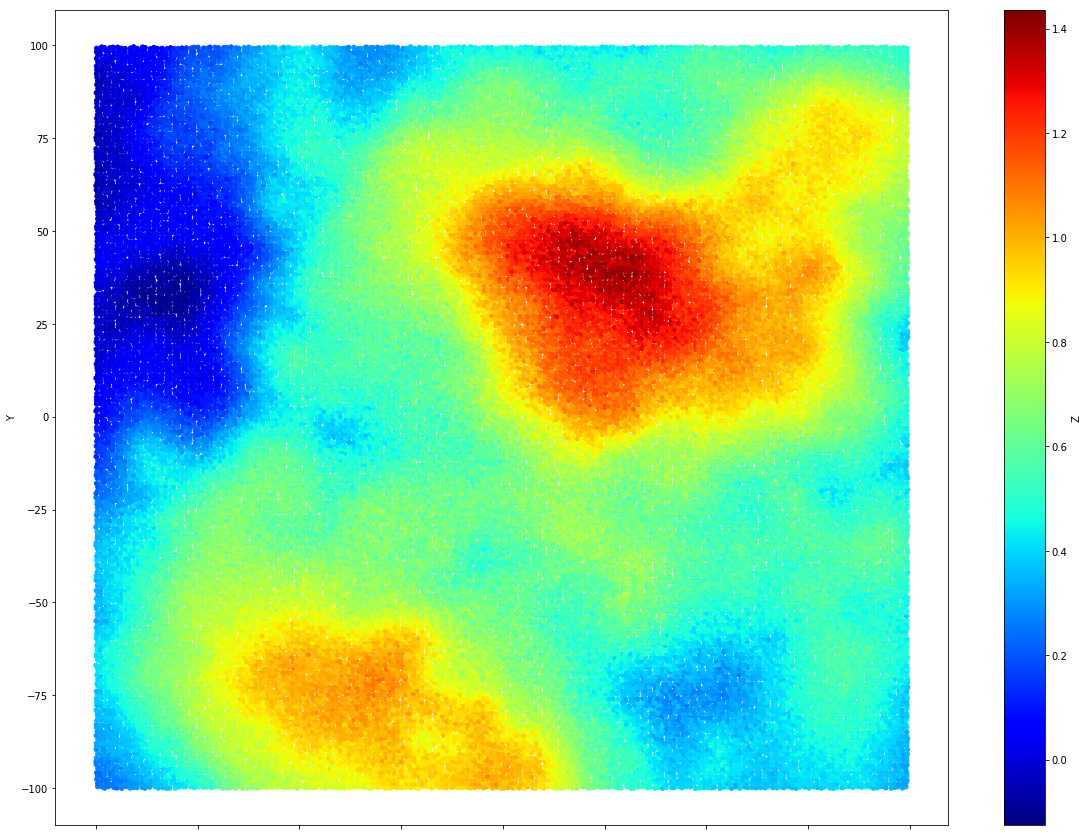

In [232]:
'''
terr = []

for i in range(0, TERRAIN_NODES):
    terr.append({
        'X': random.random() * 200 - 100,
        'Y': random.random() * 200 - 100,
        'Z': 0
    })
'''
    
# push_pull(terr)

# push_pull(terr, n=8, r=128, s=1/2.0, direction=-1)
push_pull(terr, n=16, r=64, s=1/4.0)
push_pull(terr, n=32, r=32, s=1/8.0, direction=-1)
push_pull(terr, n=64, r=16, s=1/16.0)
push_pull(terr, n=128, r=8, s=1/32.0, direction=-1)
push_pull(terr, n=256, r=4, s=1/64.0)

terr_df = pandas.DataFrame(terr)
terr_df.plot(kind='scatter', x='X', y='Y',  c='Z', cmap=matplotlib.cm.get_cmap("jet"), figsize=(20,15))

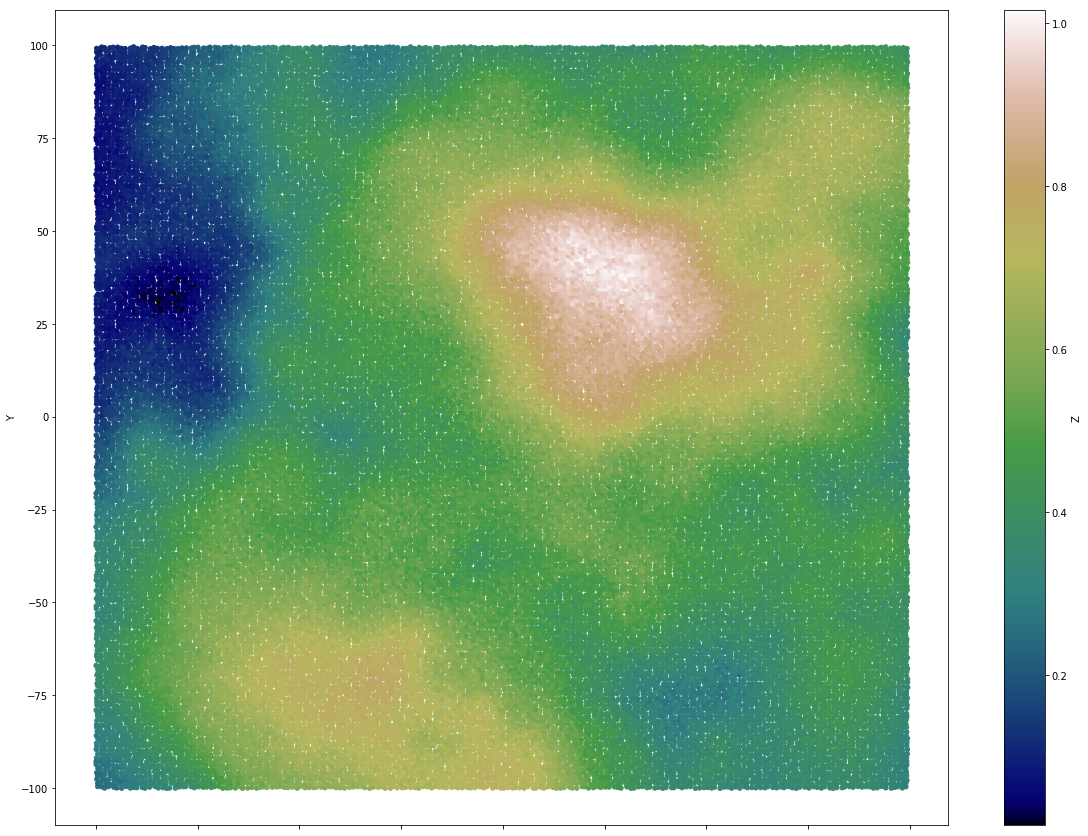

In [233]:
# normalize heightmap
terr_df['Z'] = (terr_df['Z'] - terr_df['Z'].mean()) / (terr_df['Z'].max() - terr_df['Z'].min()) + 0.5
terr_df.plot(kind='scatter', x='X', y='Y',  c='Z', cmap=matplotlib.cm.get_cmap("gist_earth"), figsize=(20,15))

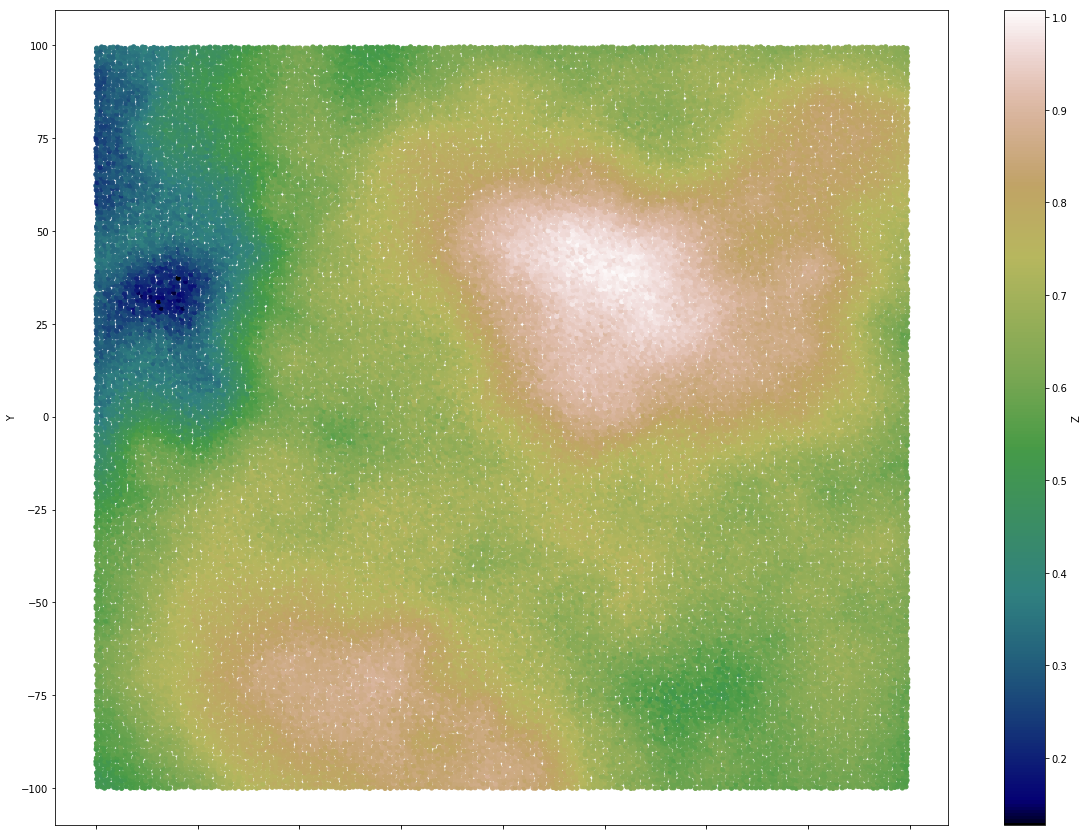

In [234]:
# round hills
terr_df['Z'] = terr_df['Z'].apply(lambda x: x ** 0.5)
terr_df.plot(kind='scatter', x='X', y='Y',  c='Z', cmap=matplotlib.cm.get_cmap("gist_earth"), figsize=(20,15))

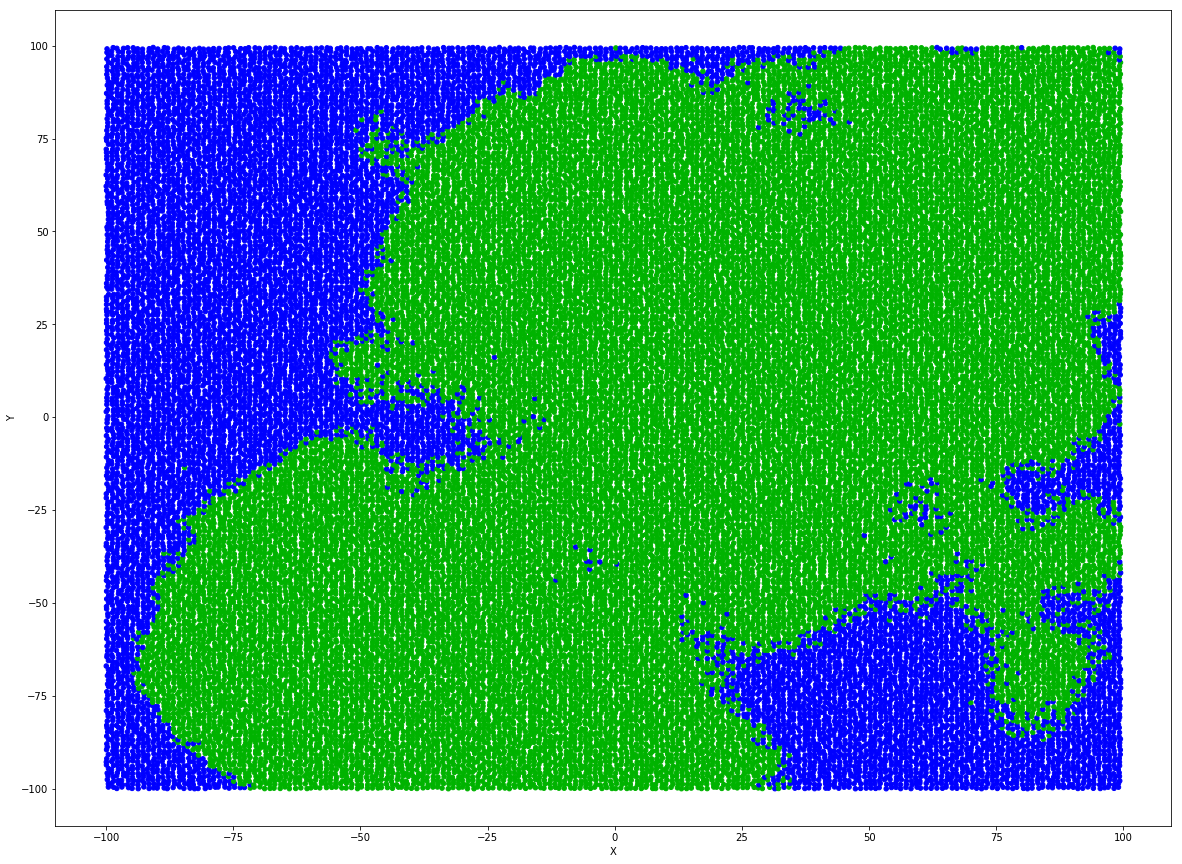

In [235]:
# show landmass
water_cutoff = terr_df['Z'].quantile(WATER_RATIO)

def cut_water(x):
    if x > water_cutoff:
        return (0, 0.7, 0)
    else:
        return (0, 0, 1)

terr_df['LandColor'] = terr_df['Z'].apply(cut_water)
terr_df.plot(kind='scatter', x='X', y='Y',  c=terr_df['LandColor'], figsize=(20,15))